# Regresión lineal

Es uno de los primeros algoritmos de machine learning que se aprenden. Aunque es un modelo sencillo, es la base de otros algoritmos de análisis de datos.

Pertenece al grupo de Aprendizaje Supervisado con datasets con datos contínuos (labels).

Consideremos la siguiente imagen:

<img src="../../images/02_global.jpg">
Fuente: Andrew Ng's Lecture notes

## Cuando usar regresión lineal

En medicina, las primeras evidencias relacionando la mortalidad con el fumar tabaco vinieron de estudios que utilizaban la regresión lineal. 

Este modelo matemático lineal se emplea continuamente en disciplinas como medicina, sociología, biología, economía, finanzas, etc. Por ejemplo, uno de los primeros estudios que relacionaron la mortalidad y el fumar tabaco utilizaban la regresión lineal. Se utiliza también para pronosticar el volumen de las próximas ventas analizando datos de ventas anteriores, o el pronóstico de las ventas en función de la inversión en publicidad, la evolución de precios...

<img src="../../images/02_438px-Linear_regression.svg.png">

Para poder utilizar un modelo de regresión lineal tienen que cumplirse algunas condiciones:
* la relación entre las variables tiene que ser lineal
* los errores en la medición de las variables deben ser independientes entre sí
* los errores deben tener varianza constante. (Homocedasticidad)
* los errores deben tener una esperanza matemática igual a cero (errores con misma magnitud y distinto signo son equiprobables).
* el error total debe ser la suma de todos los errores

## Modelo lineal

Las regresiones lineales buscan relaciones (lineales) entre una o más **features** o variables independientes y el **target** o variable dependiente.


En el caso de una dimension, la fórmula general para la regresión es:

$$ \hat{y} = w \cdot x + \beta $$

$ x $ es la *feature*. $w$ y $\beta$ son los parámetros del modelo que se aprenden a partir de los datos. $\hat{y}$ es la predicción que hace el modelo.

Esta fórmula es conocida, es la de una recta en el plano: $w$ es la pendiente y $\beta$ la ordenada al origen, el término independiente.


En el caso general, es decir, multidimensional, la fórmula de la regresión sería:

$$ \hat{y} = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_p \cdot x_p + \beta $$

$ x $ son las *features* (en este caso de *p* dimensiones) para un único punto. $ w $ y $ \beta $ son los vectores parámetro del modelo que se aprenden a partir de los datos. $ \hat{y} $ es la predicción que hace el modelo.

En lenguaje plano: el vector $w$ es el vector de pesos para las variables $x$ y la predicción es la suma pesada de la features desplazada según el vector $\beta$.



Los modelos lineales para regresión son modelos de regresión para los cuales la predicción viene dada por una recta en datos de una dimensión, un plano cuando tenemos datos de dos dimensiones y un hiperplano para datos de más dimensiones.

## Entrenando un modelo de regresión lineal

Existen muchos modelos lineales para regresión. La principal diferencia entre ellos se encuentra en la forma de calcular $w$ y $b$ y en la forma de controlar la complejidad del modelo.

Entrenar el modelo significa encontrar los parámetros mediante los cuales el modelo *encaja*  mejor con los datos. Es decir, que el error entre los datos observados y los predecidos es el mínimo.
Aunque, dependiendo de cómo se define la función de error, el resultado puede ser distinto.

El ajuste por mínimos cuadrados o Ordinary Least Squares (OLS) es el modelo lineal más simple y clásico para regresión. En este caso, los parámetros $w$  y  $b$ se obtienen  minimizando el error cuadrático medio (MSE, por sus siglas en inglés, Mean Squared Error) obtenido entre las predicciones y los valores objetivo reales.

<img src="../../images/02_mse.svg"> 

# Let's code!

Usaremos un dataset para predicción de precios de viviendas de Boston Mass.
(Fuente: US Census Service)

Primero cargamos el dataset.

In [1]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

Y visualizamos qué información contiene

In [2]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Creamos un pandas dataframe para empezar a trabajar

In [4]:
# Pandas and NumPy import
import numpy as np
import pandas as pd

# Set the features  
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Añadimos el target al dataframe para visualizar los datos

In [5]:
df['MEDV'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Empezamos con una inspección visual de los datos. Pairplot es nuestro amigo.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

A efectos de simplificación visual, reducimos el dataframe.

In [7]:
df = df[['RM', 'AGE', 'DIS', 'MEDV']]

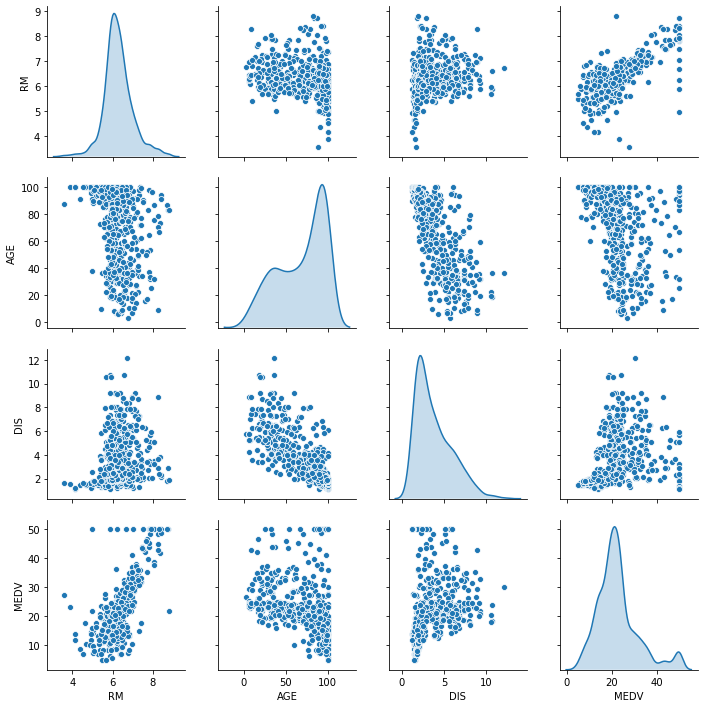

In [8]:
sns.pairplot(data=df, diag_kind='kde')

A su vez, podemos visualizar la tabla de correlaciones entre las distintas variables

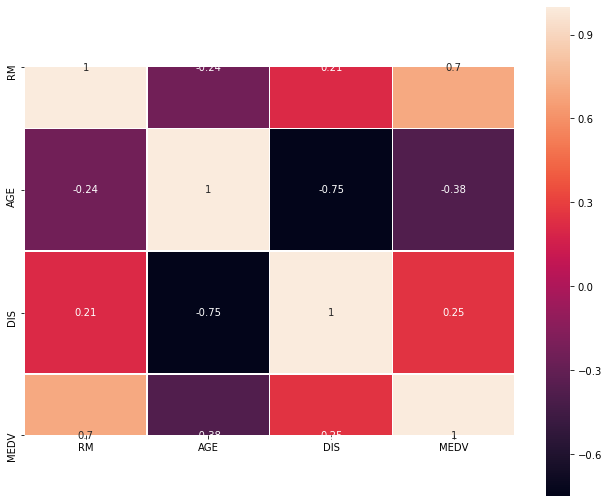

In [9]:
#displot - Heat map and correlation matrix
correlation_matrix = df.corr().round(2)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(correlation_matrix, square=True, linewidths=.5, annot=True)

Recargamos **todos** los datos y empezamos con el modelado.

In [10]:
# Set the target
target = pd.DataFrame(boston_dataset.target, columns=["MEDV"])

In [11]:
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
y = target["MEDV"]

Dividimos los datos en dos grupos: uno para *entrenar* el modelo y otro para *testear*lo.

In [12]:
#Splitting data into test and train — 20% Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Instanciamos el modelo y lo *entrenamos*

In [13]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

En este punto ya hemos obtenido la *recta de regresión* que usará el modelo para predecir los datos.

Podemos consultar, por ejemplo, los coeficientes, las $w$ del modelo y el término independiente, $\beta$

In [14]:
# pretty printing
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(lm.coef_)
print(lm.intercept_)

[-0.116 0.047 0.008 3.234 -16.687 3.884 -0.011 -1.541 0.293 -0.013 -0.906
 0.009 -0.458]
35.55487453600642


Visualizamos la correspondencia entre variables o features y coeficientes 

In [15]:
list(zip(X.columns, lm.coef_))

[('CRIM', -0.1159664519082957),
 ('ZN', 0.04712492313362737),
 ('INDUS', 0.008259801462504594),
 ('CHAS', 3.234045310301047),
 ('NOX', -16.68658901913431),
 ('RM', 3.884106514652047),
 ('AGE', -0.010897444228723654),
 ('DIS', -1.5412954044120102),
 ('RAD', 0.29320830875447956),
 ('TAX', -0.013405938287263872),
 ('PTRATIO', -0.9062964291148609),
 ('B', 0.008808234386812667),
 ('LSTAT', -0.4577238458214037)]

Y finalmente, utilizamos el modelo para predecir (los datos de test que habíamos reservado)

In [16]:
y_test_pred = lm.predict(X_test)

Comparamos los datos predecidos con los del dataset, sólo los cinco primeros ;)

In [17]:
print(y_test_pred[0:5])
print(y_test[0:5].values)

[12.075 26.989 17.588 18.156 36.921]
[16.500 24.800 17.400 19.300 37.600]


¿Cómo medimos la *calidad* del modelo?

In [18]:
lm.score(X, y)

0.7388246731809871

Alternativamente,

In [19]:
from sklearn.metrics import mean_squared_error, r2_score


rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.041784121402035
R2 score is 0.7263451459702527


Visualización del ajuste de la predicción

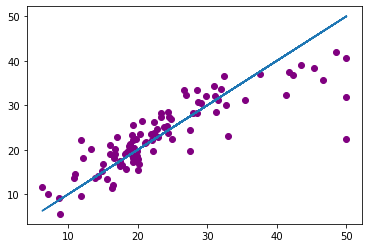

In [20]:
# Plot predictions (versus test values)
plt.scatter(y_test, y_test_pred,  color='purple')
plt.plot(y_test, y_test)

#### ¿Qué ocurriría si predijésemos los datos del training?

In [21]:
# I amb les dades de training?
y_train_pred = lm.predict(X_train)
print(y_train_pred[0:5])
print(y_train[0:5].values)

[32.489 14.197 24.928 19.489 37.242]
[36.400 13.300 24.800 20.400 44.000]


In [22]:
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.604035178213393
R2 score is 0.7415244219726307


# What if....

* ¿Usamos sólo algunas features?
* ¿Cuántas y cuáles?
* Premio al que consiga el mejor score con sólo 3 variables!

In [23]:
# ejercicio....